# Lab 11

In this lab we discuss confidence intervals and bootstrap method.

## Quantifying Uncertainty

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**np.random.randint:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [2]:
# We generate 1000 random integer numbers from 100 to 250 to simulate body weights of 1000 people.
np.random.seed(0)
weight = np.random.randint(100, 250, size = 1000)
df = pd.DataFrame({"Weight":weight})
df

Weight
0       147
1       217
2       167
3       203
4       109
..      ...
995     219
996     127
997     151
998     178
999     186

[1000 rows x 1 columns]

In [3]:
# Calculating summary statistics for the variable "Weight"
df.describe()

Weight
count  1000.000000
mean    177.241000
std      43.189423
min     100.000000
25%     139.000000
50%     181.000000
75%     215.000000
max     249.000000

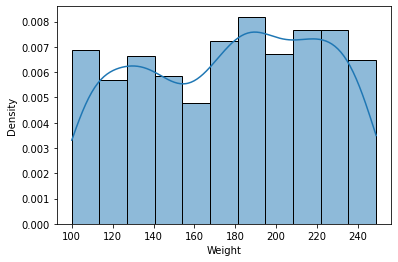

In [4]:
# We can see the distribution of the values in the column "Weight".
# This is not a normal distribution!
sns.histplot(df['Weight'], stat = 'density', kde = True)
plt.show()

### Constructing Confidence Interval for the Mean via Central Limit Theorem

A confidence level of 95% gives a probability of 95% that the proposed interval will capture the true mean value in repeated samples. That is, the confidence level is the success rate for the method.

In [5]:
# We can obtain confidence interval using the central limit theorem.
# First we need to calculate the standard error.
std_err = np.std(df.Weight, ddof = 1) / np.sqrt(len(df))
print("standard error:", std_err)

standard error: 1.3657694700223935


In [6]:
# 95% of the area under a normal curve lies within 1.96 standard deviations of the mean.
# Due to the CLT, 1.96 is therefore used in the construction of 95% confidence intervals.
crit_val = 1.96
norm_ci = [df.Weight.mean() - crit_val * std_err, df.Weight.mean() + crit_val * std_err]
print("confidence interval via CLT:", norm_ci)

confidence interval via CLT: [174.56409183875613, 179.9179081612439]


**Important:** we don’t know whether the 95% confidence interval from a particular sample is one of the 95% that capture the true population mean or one of the unlucky 5% that miss.

To say that we are 95% confident that the unknown 𝜇 lies between 174.56 and 179.92 is shorthand for “We got these numbers using a method that gives correct results 95% of the time.”


### Constructing Confidence Interval via Bootstrap

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as mean or standard deviation.

**np.zeros:** https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

In [7]:
# We define a function to create 10000 bootstrap datasets and compute mean for each.
def CreateBootstrapMeans(data):
    num_boot = 10000
    n = len(data)
    boot_means = np.zeros(num_boot)
    np.random.seed(0)
    for i in range(num_boot):
        d = data.sample(n, replace = True)
        boot_means[i] = d.mean()
    return boot_means

In [8]:
# Let's find the mean values for bootstrap samples!
boot_means = CreateBootstrapMeans(df)
boot_means

array([178.29 , 175.828, 177.224, ..., 177.354, 176.787, 176.975])

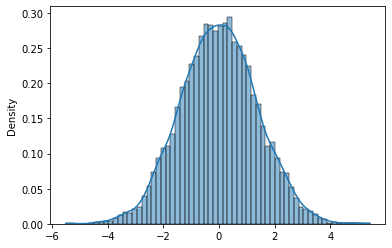

In [9]:
# We can see the distribution of the differences between the bootstrap means and mean of the original dataset.
diff = boot_means - df.Weight.mean()
sns.histplot(diff, stat = 'density', kde = True)
plt.show()

**np.quantile:** https://numpy.org/doc/stable/reference/generated/numpy.quantile.html

In [10]:
# Computing the necessary quantiles for 95% confidence interval
boot_ci = np.quantile(boot_means, [0.025, 0.975])
print(boot_ci)

[174.612975 179.916075]


**plt.hist:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

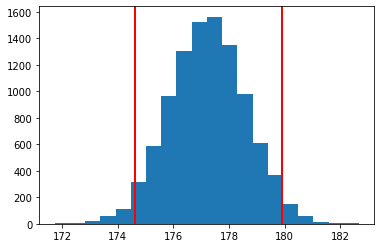

In [11]:
# Visualizing the confidence interval
plt.hist(boot_means, bins = 20)
plt.axvline(boot_ci[0], color = 'red', linewidth = 2)
plt.axvline(boot_ci[1], color = 'red', linewidth = 2)
plt.show()